In [8]:
x=pd.read_csv('E-commerce Website Logs.csv')
x

/tmp/ipython-input-1610438815.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  x=pd.read_csv('E-commerce Website Logs.csv')


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.00,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.00,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.00,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.00,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.00,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-16 11:42:01.298,4372,TCP,94.197.121.229,100600,Android App,NaN,Male,US,Normal,English,0.0000,Yes,143.36,Debit Card
172834,2017-03-16 12:10:17.340,2167,TCP,129.110.241.72,30400,Android App,NaN,Female,IT,Normal,English,15.1500,No,0.00,Cash
172835,2017-03-16 12:10:17.340,2725,TCP,185.119.252.121,100300,Android App,NaN,Female,IT,Normal,English,600.1600,No,0.00,Credit Card
172836,2017-03-16 15:52:58.342,3728,TCP,185.145.107.23,50200,Android App,NaN,Male,US,Normal,Russian,75.7500,No,0.00,Cash


/tmp/ipython-input-971766051.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E-commerce Website Logs.csv')


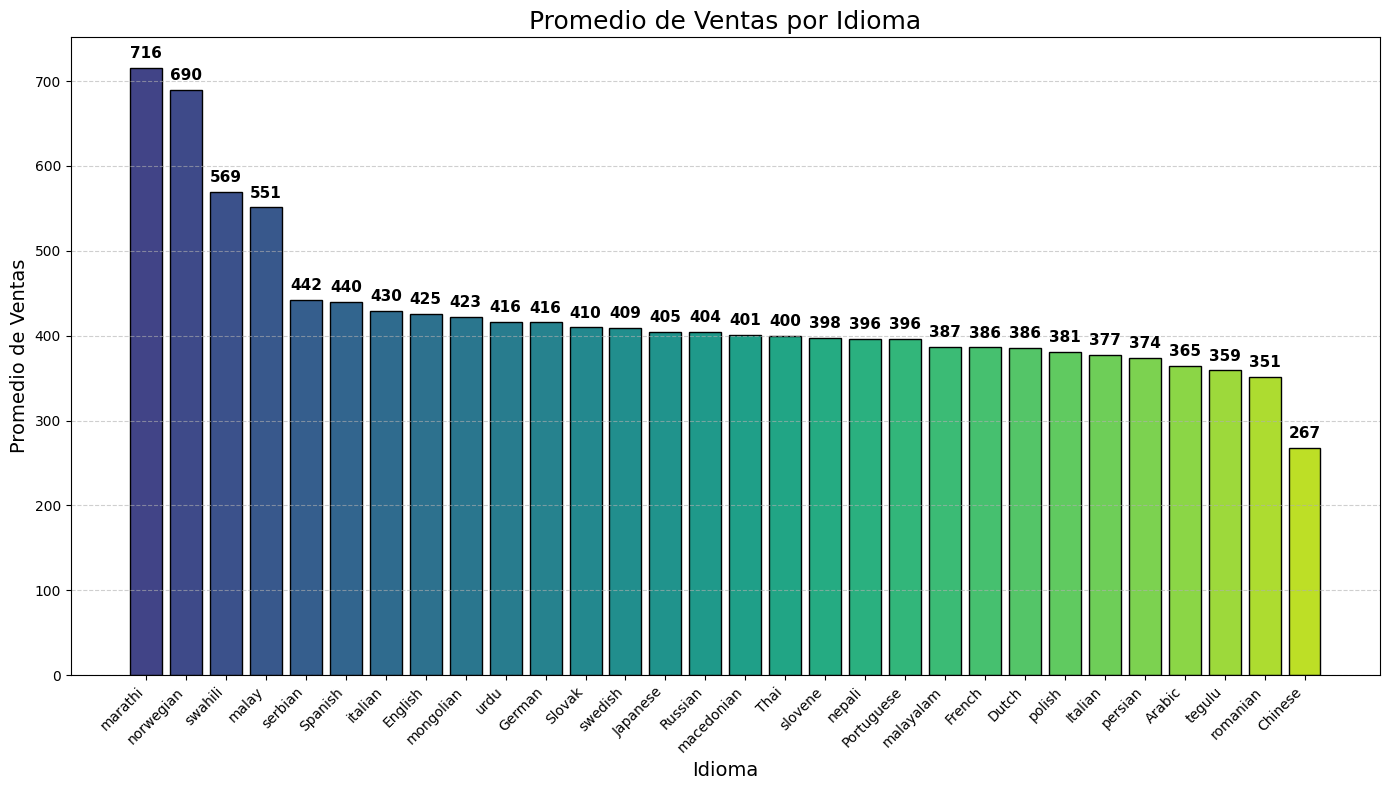

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar y normalizar columnas
df = pd.read_csv('E-commerce Website Logs.csv')
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Extraer columnas relevantes
languages = df['language'].to_numpy()
sales = df['sales'].to_numpy()

# Obtener idiomas únicos
unique_langs = np.unique(languages)

# Calcular promedio de ventas por idioma con NumPy
sales_avg = np.array([np.mean(sales[languages == lang]) for lang in unique_langs])

# Ordenar por promedio descendente
sorted_indices = np.argsort(sales_avg)[::-1]
sorted_langs = unique_langs[sorted_indices]
sorted_avg = sales_avg[sorted_indices]

# Crear color degradado
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sorted_avg)))

# Crear gráfico
plt.figure(figsize=(14,8))
bars = plt.bar(sorted_langs, sorted_avg, color=colors, edgecolor='black')

# Añadir etiquetas sin bucle
plt.bar_label(
    bars,
    labels=[f'{x:,.0f}' for x in sorted_avg],
    padding=5,
    fontsize=11,
    fontweight='bold'
)

# Personalización visual
plt.title('Promedio de Ventas por Idioma', fontsize=18)
plt.xlabel('Idioma', fontsize=14)
plt.ylabel('Promedio de Ventas', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# Guardar como imagen
plt.savefig('promedio_ventas_idioma_numpy.png')

# Mostrar gráfico
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

/tmp/ipython-input-479222226.py:6: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('E-commerce Website Logs.csv')


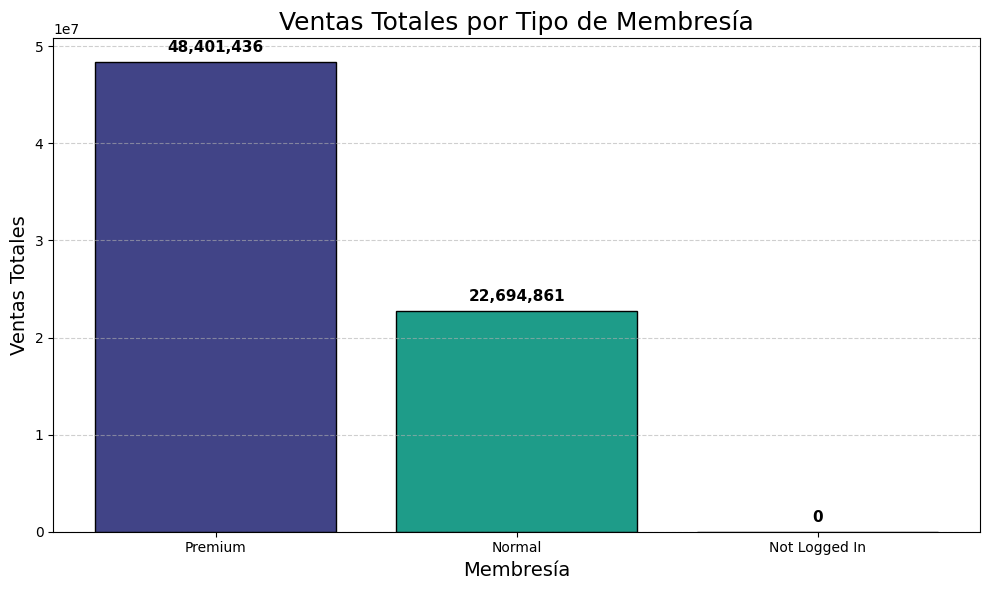

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar y normalizar columnas
df = pd.read_csv('E-commerce Website Logs.csv')
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Extraer columnas relevantes
members = df['membership'].to_numpy()
sales = df['sales'].to_numpy()

# Obtener tipos únicos de membresía
unique_members = np.unique(members)

# Calcular ventas totales por membresía con NumPy
sales_totals = np.array([sales[members == m].sum() for m in unique_members])

# Ordenar por ventas descendentes
sorted_indices = np.argsort(sales_totals)[::-1]
sorted_members = unique_members[sorted_indices]
sorted_sales = sales_totals[sorted_indices]

# Crear color degradado
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(sorted_sales)))

# Crear gráfico
plt.figure(figsize=(10,6))
bars = plt.bar(sorted_members, sorted_sales, color=colors, edgecolor='black')
plt.bar_label(bars, labels=[f'{x:,.0f}' for x in sorted_sales], padding=5, fontsize=11, fontweight='bold')
plt.title('Ventas Totales por Tipo de Membresía', fontsize=18)
plt.xlabel('Membresía', fontsize=14)
plt.ylabel('Ventas Totales', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('ventas_totales_membresia_numpy.png')
plt.show()